# **OLIVIA - Analisis**

Import olivia

In [1]:
# Add olivia to the python path
import sys
sys.path.append('../../olivia')

Install requirements (use python3.8)

In [2]:
!pip install -r requirements.txt

## BIOCONDUCTOR TEST


### Model

In [ ]:
from olivia.model import OliviaNetwork

Load prebuilt bioconductor model

In [4]:
bioconductor = OliviaNetwork(r'../olivia_finder/results/olivia_prebuilts/bioconductor.olv')

In [5]:
bioconductor['a4'].direct_dependencies()

{'a4Base', 'a4Classif', 'a4Core', 'a4Preproc', 'a4Reporting'}

In [7]:
len(bioconductor['a4'].transitive_dependencies())

50

### Coupling

In [6]:
from olivia.coupling import *

In [8]:
transitive_coupling(bioconductor,'a4Classif','a4')

1

In [ ]:
coupling_interface(bioconductor,'a4Classif','a4')

{'a4Classif'}

In [ ]:
coupling_profile(bioconductor,'a4')

{'survival': {'a4Base'},
 'KEGGREST': {'a4Base'},
 'grid': {'a4Base'},
 'varSelRF': {'a4Classif'},
 'multtest': {'a4Base'},
 'crayon': {'a4Base'},
 'MASS': {'a4Base'},
 'RSQLite': {'a4Base'},
 'genefilter': {'a4Base'},
 'IRanges': {'a4Base'},
 'AnnotationDbi': {'a4Base'},
 'tools': {'a4Base'},
 'GenomeInfoDbData': {'a4Base'},
 'Biostrings': {'a4Base'},
 'GenomeInfoDb': {'a4Base'},
 'zlibbioc': {'a4Base'},
 'limma': {'a4Base'},
 'png': {'a4Base'},
 'utils': {'a4Base', 'a4Classif', 'a4Core', 'a4Preproc'},
 'annotate': {'a4Base'},
 'XML': {'a4Base'},
 'BiocGenerics': {'a4Base', 'a4Classif', 'a4Core', 'a4Preproc'},
 'mpm': {'a4Base'},
 'a4Core': {'a4Base', 'a4Classif', 'a4Core'},
 'pamr': {'a4Classif'},
 'Biobase': {'a4Base', 'a4Classif', 'a4Core', 'a4Preproc'},
 'DBI': {'a4Base'},
 'grDevices': {'a4Base'},
 'MatrixGenerics': {'a4Base'},
 'graphics': {'a4Base', 'a4Classif', 'a4Core', 'a4Preproc'},
 'glmnet': {'a4Base', 'a4Classif', 'a4Core'},
 'R': {'a4Base', 'a4Classif', 'a4Core', 'a4Prep

Text(0.5, 1.0, 'package: a4')

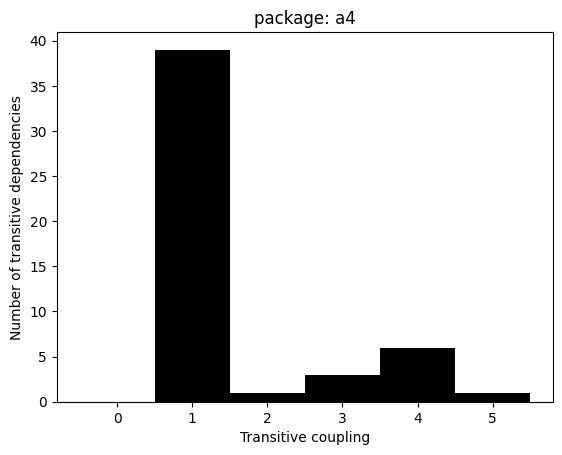

In [ ]:
# Requires Matplotlib installed
import matplotlib.pyplot as plt
import numpy as np

cp = coupling_profile(bioconductor,'a4')
ls = [len(cp[l]) for l in cp]
bins = np.arange(0, max(ls) + 1.5) - 0.5
plt.hist(ls,bins,color='black',histtype='stepfilled')
plt.xlabel('Transitive coupling')
plt.ylabel('Number of transitive dependencies')
plt.title('package: a4')

You may also access coupling methods via *PackageInfoView*:

In [ ]:
bioconductor['a4'].coupling_interface_to('a4Base')

set()

In [ ]:
bioconductor['a4'].coupling_profile()

{'survival': {'a4Base'},
 'KEGGREST': {'a4Base'},
 'grid': {'a4Base'},
 'varSelRF': {'a4Classif'},
 'multtest': {'a4Base'},
 'crayon': {'a4Base'},
 'MASS': {'a4Base'},
 'RSQLite': {'a4Base'},
 'genefilter': {'a4Base'},
 'IRanges': {'a4Base'},
 'AnnotationDbi': {'a4Base'},
 'tools': {'a4Base'},
 'GenomeInfoDbData': {'a4Base'},
 'Biostrings': {'a4Base'},
 'GenomeInfoDb': {'a4Base'},
 'zlibbioc': {'a4Base'},
 'limma': {'a4Base'},
 'png': {'a4Base'},
 'utils': {'a4Base', 'a4Classif', 'a4Core', 'a4Preproc'},
 'annotate': {'a4Base'},
 'XML': {'a4Base'},
 'BiocGenerics': {'a4Base', 'a4Classif', 'a4Core', 'a4Preproc'},
 'mpm': {'a4Base'},
 'a4Core': {'a4Base', 'a4Classif', 'a4Core'},
 'pamr': {'a4Classif'},
 'Biobase': {'a4Base', 'a4Classif', 'a4Core', 'a4Preproc'},
 'DBI': {'a4Base'},
 'grDevices': {'a4Base'},
 'MatrixGenerics': {'a4Base'},
 'graphics': {'a4Base', 'a4Classif', 'a4Core', 'a4Preproc'},
 'glmnet': {'a4Base', 'a4Classif', 'a4Core'},
 'R': {'a4Base', 'a4Classif', 'a4Core', 'a4Prep

### Strongly connected components

As OLIVIA internally uses the precomputed structure of SCCs of the dependency network, you can iterate immediatly over SCCs: 

In [9]:
scc_iterator = bioconductor.sccs()
print(next(scc_iterator))
print(next(scc_iterator))
print(next(scc_iterator))
print("...")

{'metaseqR2'}
{'ABSSeq'}
{'MODA'}
...


In [10]:
bioconductor.sorted_clusters()[:10]

[{'metaseqR2'},
 {'ABSSeq'},
 {'MODA'},
 {'AMOUNTAIN'},
 {'ASEB'},
 {'NADfinder'},
 {'ATACseqQC'},
 {'AlphaBeta'},
 {'epimutacions'},
 {'signifinder'}]

In [11]:
bioconductor['genefilter'].scc()

{'genefilter'}

### Network vulnerability

In [14]:
from olivia.networkmetrics import *
from olivia.packagemetrics import Impact

In [13]:
failure_vulnerability(bioconductor)

Computing Reach
     Processing node: 3K      


24.817326873753206

In [15]:

failure_vulnerability(bioconductor, metric=Impact)

Computing Impact
     Processing node: 3K      


56.51154174978626

## CRAN TEST